H-RM Tan -- revised Oct 2016

Script combines movieInfo + budget + binned Genre & Studios data; Performs overview exploration and summary & Runs various Linear Regression Analyses

## Import Relevant Modules

In [1]:
import matplotlib
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Combine Data sets 

In [4]:
# combiDF2b.to_csv('combined_mvInfo_subset_MatchIDX_cleaned')
combiDF = pd.read_csv('mvInfo_subset_MatchIDX_COMBINEDcleaned')

In [ ]:
# combiDF.columns

In [5]:
combiDF0 = combiDF.loc[:,['mID', 'mName', 'mYrank', 'mStudio', 
                      'openWkdate','DURrelease', 'openDTheatre', 'openDGross', 'totalDTheatre',
                       'PD_budget', 'totalDGross', 'W_gross', 'F_gross', 'Genre', 'mv_runtime',
           'mv_Dir', 'mv_Prod', 'mv_Comp', 'OscarNom', 'OscarInfoURL', 'Animation',
       'Adventure', 'Action', 'Comedy', 'Drama', 'Documentary', 'Family',
       'Fantasy', 'Foreign', 'Horror', 'Period', 'Sci-Fi', 'Thriller',
       'Western', 'Romance', 'warnerbros', 'universal', 'fox', 'buenavista',
       'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
       'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
       'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate', 'dreamworks',
       'D_RtnOInvest', 'W_RtnOInvest', 'logD_RtnOInvest', 'logW_RtnOInvest',
       'logDURrelease', 'logOpenDGross', 'logTotalDGross', 'openYR', 'openWK',
       'openDay', 'openWkday']]


In [ ]:
# combiDF0#.describe()

## Exploratory & Summary Plots  

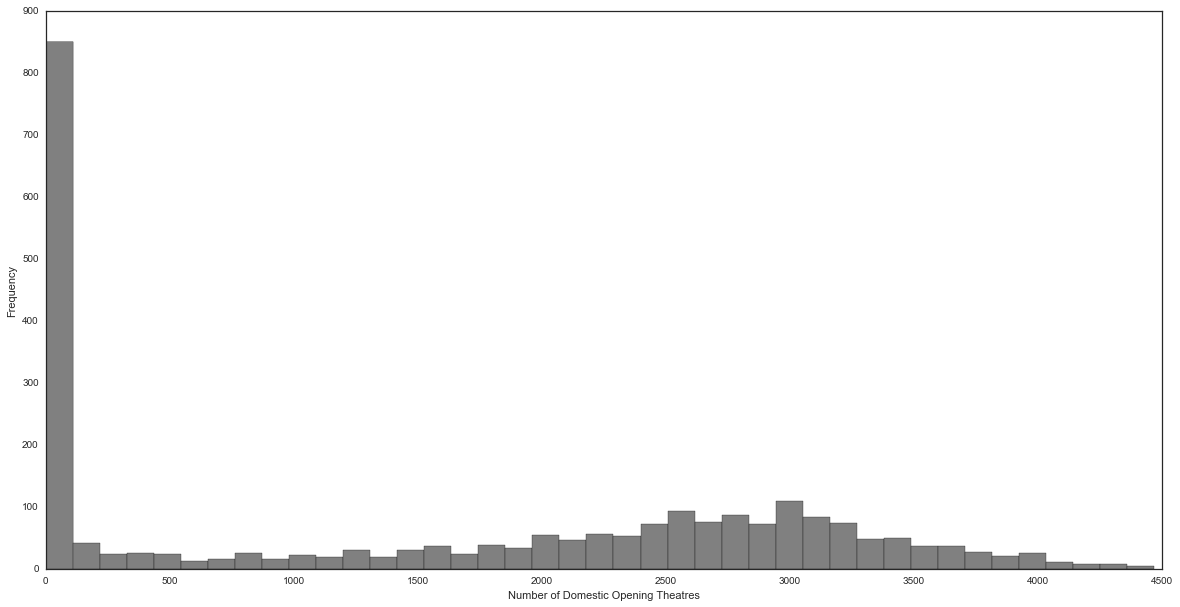

In [6]:
sns.set_style("white")
plt.figure(1,figsize=[20,10]);
combiDF0.openDTheatre.plot.hist(41, color='grey')
plt.xlabel('Number of Domestic Opening Theatres')

In [7]:
genreList = ['Animation', 'Adventure', 'Action', 'Comedy', 'Drama', 'Documentary', 'Family','Fantasy', 'Foreign', 
'Horror', 'Period','Sci-Fi', 'Thriller','Western', 'Romance']


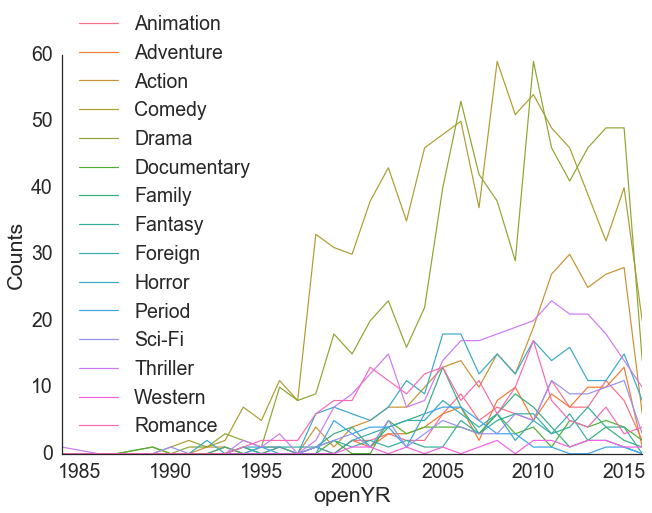

In [10]:
sns.set_style("white")
sns.set_palette("husl",15)
plt.figure(1,figsize=[30,40])
combiDF0.groupby(by=['openYR']).sum()[genreList].plot()
plt.ylabel('Counts')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()


In [9]:
studioList = ['warnerbros', 'universal', 'fox', 'buenavista',
       'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
       'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
       'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate', 'dreamworks']

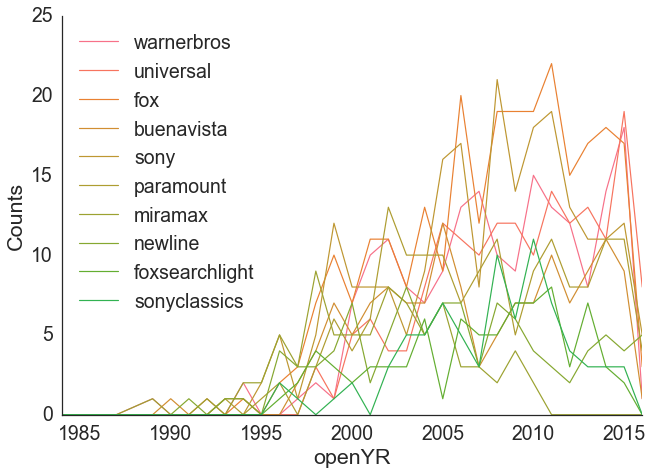

In [11]:
sns.set_palette("husl",25)
plt.figure(2,figsize=[20,30])
combiDF0.groupby(by=['openYR']).sum()[studioList[:10]].plot()
plt.ylabel('Counts')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})
sns.despine()

In [12]:
mvTotbyStudio = combiDF0.sum()[studioList]
mvTotbyStudio = mvTotbyStudio.to_frame('totalMvs')#.loc['warnerbros'].totalMvs
# mvTotbyStudio

In [13]:

DF00 = pd.DataFrame(None)

for s in studioList:
    StuMvTot = mvTotbyStudio.loc[s].totalMvs
    for g in genreList:
        tmp=combiDF0.groupby(by=[s]).sum()[g]#.iloc[1,:]
        if any(tmp.to_frame().index.values == 1):
            m0,m1 = tmp/StuMvTot
        else :
            m0 = tmp[0]/StuMvTot
            m1 = np.nan
        
#         DF00 = pd.concat([DF00, pd.DataFrame([dict(zip(['Studio', 'Genre','Count'], [s,g, m1]))],
#                                            columns=['Studio','Genre','Count'] ) ], axis=0 )

        DF00 = pd.concat([DF00, pd.DataFrame([dict(zip(['Studio', 'Genre','Percentage'], [s,g, m1]))],
                                           columns=['Studio','Genre','Percentage'] ) ], axis=0 )


In [14]:
DF00 = DF00.reset_index().iloc[:,1:]

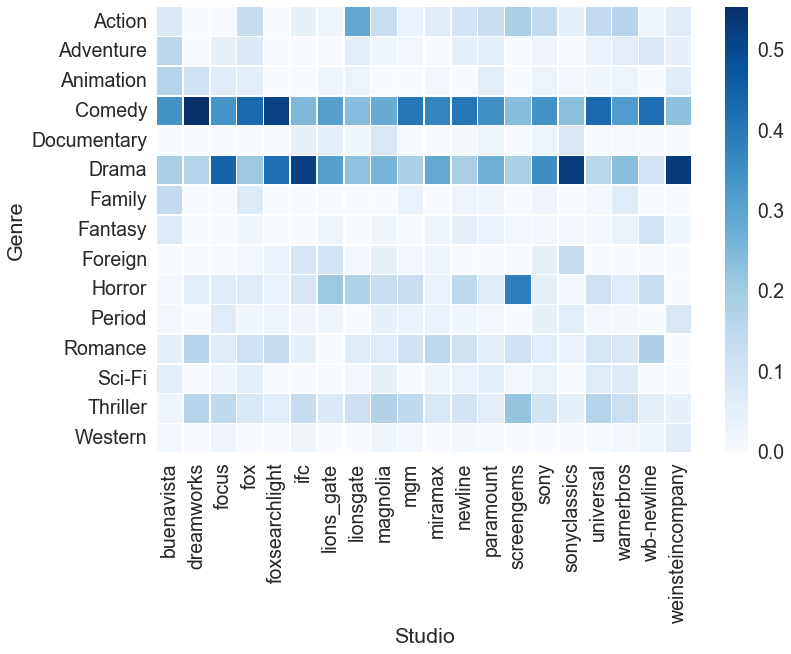

In [15]:
# DF00
# DF00pivot = DF00.pivot("Genre", "Studio", "Count")
DF00pivot = DF00.pivot("Genre", "Studio", "Percentage")
DF00pivot #.max().max() #
plt.figure(3, figsize=[12,8])
sns.heatmap(DF00pivot, vmin=0, vmax=DF00pivot.max().max(), cmap="Blues", fmt="d", linewidths=.5)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 8})

In [16]:
DF0 = pd.DataFrame(None)

for s in studioList: #[:2]:
    for g in genreList:
        tmp = combiDF0[combiDF0[s]==1].groupby(by=[g])['logW_RtnOInvest'].mean() #.median()
        if any(tmp.to_frame().index.values == 1):
            m0,m1 = tmp
        else :
            m0 = tmp[0]
            m1 = np.nan
        #print(s, g, m0, m1)
        DF0 = pd.concat([DF0, pd.DataFrame([dict(zip(['Studio','Genre','logWroi'], [s,g, m1]))],
                                           columns=['Studio','Genre','logWroi'] ) ], axis=0 )



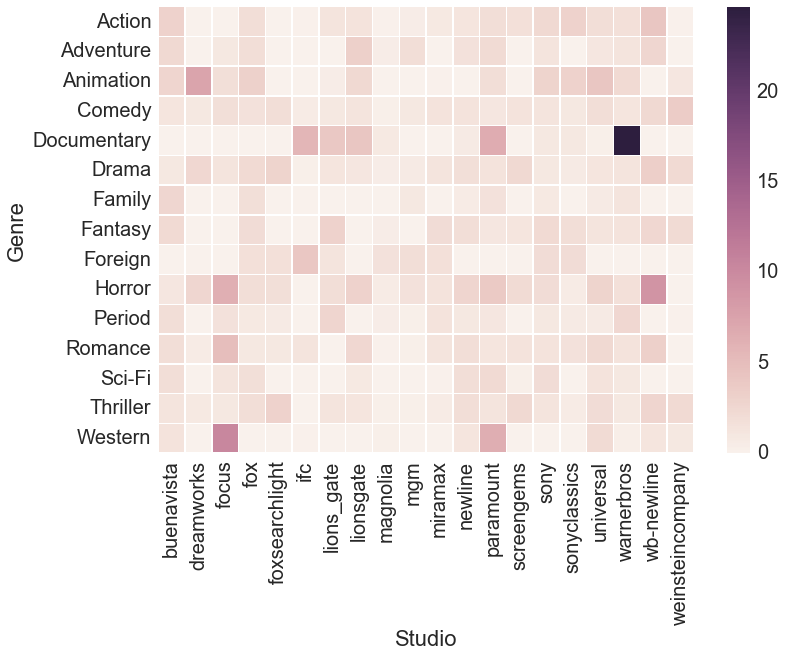

In [17]:
# DF0
DF0pivot = DF0.pivot("Genre", "Studio", "logWroi")
DF0pivot = np.exp(DF0pivot)
DF0pivot = DF0pivot.fillna(0)
# DF0pivot #.max().max() #24.6920765832106
plt.figure(4, figsize=[12,8])
sns.heatmap(DF0pivot, vmin=0, vmax=DF0pivot.max().max(), fmt="d", linewidths=.5) #,cmap="YlGnBu"
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 8})

In [ ]:
combiDF0.columns

# Index([0'mID', 1'mName', 2'mYrank', 3'mStudio', 4'openWkdate', 5'DURrelease',
#        6'openDTheatre', 7'openDGross', 8'totalDTheatre', 9'PD_budget',
#        10'totalDGross', 11'W_gross', 12'F_gross', 13'Genre', 14'mv_runtime', 15'mv_Dir',
#        16'mv_Prod', 17'mv_Comp', 18'OscarNom', 19'OscarInfoURL', 20'Animation',
#        21'Adventure', 22'Action', 23'Comedy', 24'Drama', 25'Documentary', 26'Family',
#        27'Fantasy', 28'Foreign', 29'Horror', 30'Period', 31'Sci-Fi', 32'Thriller',
#        33'Western', 34'Romance', 35'warnerbros', 36'universal', 37'fox', 38'buenavista',
#        38'sony', 39'paramount', 40'miramax', 41'newline', 42'foxsearchlight',
#        43'sonyclassics', 44'lionsgate', 45'mgm', 46'screengems', 47'weinsteincompany',
#        48'focus', 49'magnolia', 50'ifc', 51'wb-newline', 52'lions_gate', 53'dreamworks',
#        54'D_RtnOInvest', 55'W_RtnOInvest', 56'logD_RtnOInvest', 57'logW_RtnOInvest',
#        58'logDURrelease', 59'logOpenDGross', 60'logTotalDGross', 61'openYR', 62'openWK',
#        63'openDay', 64'openWkday'],


In [18]:
combiDF0.shape

(2457, 66)

In [ ]:
# EXAMINE SCATTER PLOTS 

# sns.pairplot(combiDF0.corr())
# plt.matshow(combiDF0.corr())



In [19]:
X_tmp0 = combiDF0.loc[:,[
                        'mYrank', 
                        'openDTheatre', #'totalDTheatre',
                        'mv_runtime', 'DURrelease', #'logDURrelease',
                        'OscarNom',
                        'openYR', 'openWK', 'openDay', 'openWkday',
                        #                        'PD_budget', 'totalDGross', 'W_gross'#,
                        #                        'logOpenDGross', 'logTotalDGross'#,
                        'Animation',
                        'Adventure', 'Action', 'Comedy', 'Drama', 
                               'Documentary', 
                        'Family',
                        'Fantasy', 'Foreign',
                        'Horror', 'Period', 'Sci-Fi', 'Thriller',
                                'Western', 
                        'Romance',
                        'warnerbros', 
                        'universal', 'fox', 'buenavista',
                        'sony', 'paramount', 'miramax', 'newline', 'foxsearchlight',
                        'sonyclassics', 'lionsgate', 'mgm', 'screengems', 'weinsteincompany',
                        'focus', 'magnolia', 'ifc', 'wb-newline', 'lions_gate',
                        'dreamworks', ##
                        #                        'D_RtnOInvest', 'W_RtnOInvest', 
                        #                         'logD_RtnOInvest', 
                        'logW_RtnOInvest'
                      ] ]



### Assessing partial correlation matrix

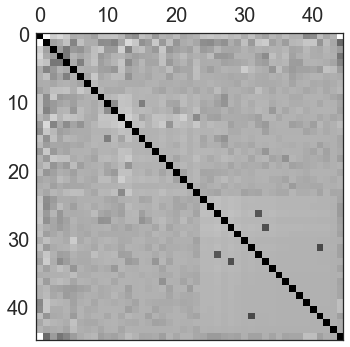

In [20]:
plt.matshow(X_tmp0.corr())

In [ ]:
# sns.pairplot(X_tmp0)

In [21]:
X_tmp0 = X_tmp0.dropna()

In [22]:
X_tmp1 = X_tmp0
# X_tmp1 = X_tmp0[X_tmp0.openYR >=1996]

In [ ]:
# X_tmp1

In [23]:
# Hard to interpret..
## 'Family','sony',  ## leaving these out

X_tmp = X_tmp1.loc[:,[
                        'openDTheatre', 
                        'mv_runtime', 
                        'DURrelease', 
                        'OscarNom',
                        'Animation',
                        'Adventure', 
                        'Action', 
                        'Comedy', 
                        'Drama', 
                        'Documentary', 
#                         'Family', 
                        'Fantasy', 
                        'Foreign',
                        'Horror', 
                        'Period', 
                        'Sci-Fi', 
                        'Thriller',
                        'Western', 
                        'Romance',
                        'warnerbros', 
                        'universal', 
                        'fox', 
                        'buenavista',
#                         'sony', 
                        'paramount', 
                        'miramax', 
                        'newline', 
                        'foxsearchlight',
                        'sonyclassics', 
                        'lionsgate', 
                        'mgm', 
                        'screengems', 
                        'weinsteincompany',
                        'focus', 
                        'magnolia', 
                        'ifc', 
                        'wb-newline', 
                        'dreamworks', 
                        'logW_RtnOInvest'
                      ] ]

In [25]:

# 'Family',  ## leaving this dummy out
Xg_tmp = X_tmp1.loc[:,[
                        'openDTheatre', 
                        'mv_runtime', 
                        'DURrelease', 
                        'OscarNom',
                        'Animation',
                        'Adventure', 
                        'Action', 
                        'Comedy', 
                        'Drama', 
                        'Documentary', 
#                         'Family',
                        'Fantasy', 
                        'Foreign',
                        'Horror', 
                        'Period', 
                        'Sci-Fi', 
                        'Thriller',
                        'Western', 
                        'Romance',
                        'logW_RtnOInvest'
                      ] ]

# 'sony',  ## leaving this dummy out
Xs_tmp = X_tmp1.loc[:,[
                        'openDTheatre', 
                        'mv_runtime', 
                        'DURrelease', 
                        'OscarNom',
                        'warnerbros', 
                        'universal', 
                        'fox', 
                        'buenavista',
#                         'sony', 
                        'paramount', 
                        'miramax', 
                        'newline', 
                        'foxsearchlight',
                        'sonyclassics', 
                        'lionsgate', 
                        'mgm', 
                        'screengems', 
                        'weinsteincompany',
                        'focus', 
                        'magnolia', 
                        'ifc', 
                        'wb-newline', 
                        'dreamworks', 
                        'logW_RtnOInvest'
                      ] ]

In [26]:
# X_tmp.columns
X_tmp.shape, Xg_tmp.shape, Xs_tmp.shape

((2416, 37), (2416, 19), (2416, 23))

In [ ]:
# Xs_tmp

### Partitioning Data by Opening Theatre 'bins'

In [27]:
ahFilms = X_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms = X_tmp[(X_tmp.openDTheatre>250)].reset_index()

##genre
ahFilms_g = Xg_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms_g = Xg_tmp[(X_tmp.openDTheatre>250)].reset_index()

##studio
ahFilms_s = Xs_tmp[X_tmp.openDTheatre<=20].reset_index()
boFilms_s = Xs_tmp[(X_tmp.openDTheatre>250)].reset_index()

In [ ]:
# ahFilms
# ahFilms.iloc[[542,34,125,141,348,371,405],:]=np.nan
# ahFilms = ahFilms.dropna()

In [ ]:
# boFilms.iloc[674,:]=np.nan
# boFilms = boFilms.dropna()

In [ ]:
# ahFilms.openDTheatre.plot.hist(20)

In [ ]:
# boFilms.openDTheatre.plot.hist(20)

/Users/hrm/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


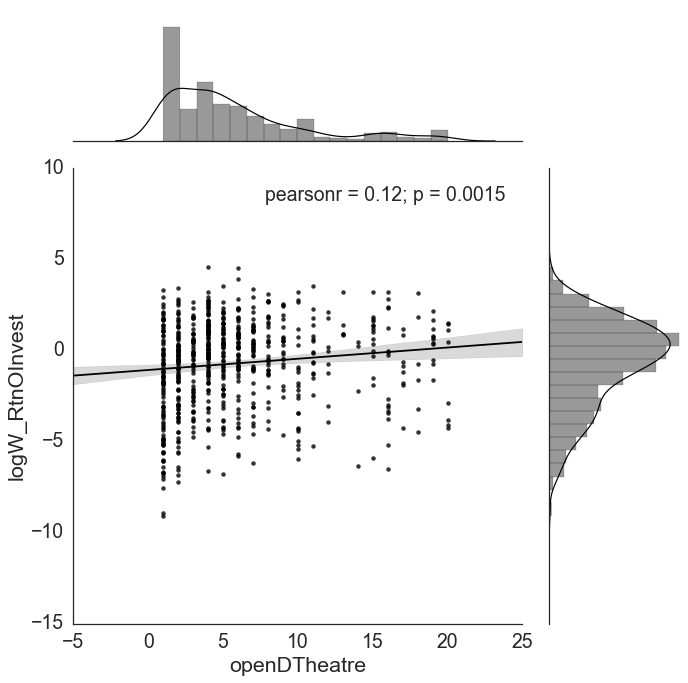

In [29]:
# sns.set_palette("Blues")
g = sns.jointplot("openDTheatre", "logW_RtnOInvest", data=ahFilms, size=10, ratio=3, color='k', kind="reg")#, stat_func=None)
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})

/Users/hrm/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


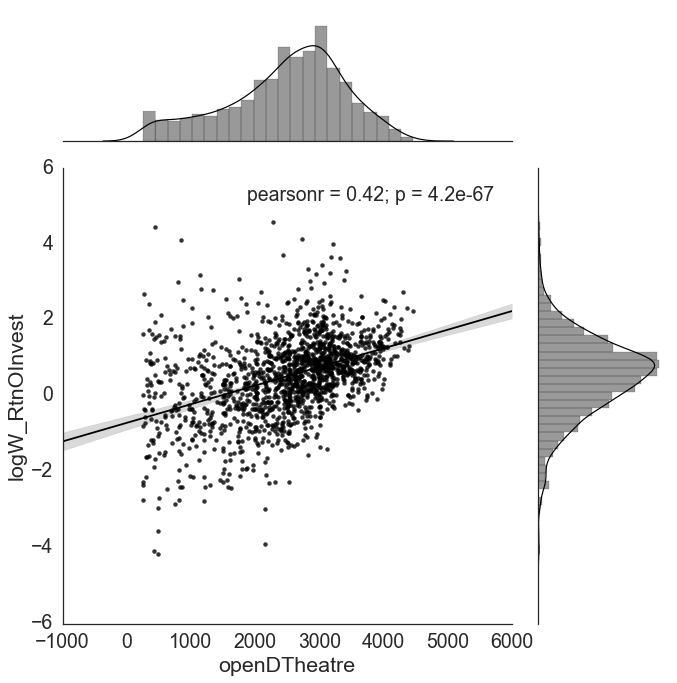

In [30]:
g = sns.jointplot("openDTheatre", "logW_RtnOInvest", data=boFilms, size=10,ratio=3, color='k', kind="reg");#, stat_func=None)
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.2})

In [ ]:
# import seaborn as sns; sns.set(style="white", color_codes=True)
# g = sns.jointplot("Action", "logW_RtnOInvest", data=boFilms, ratio=3, kind="reg")

In [ ]:

# X_tmp.shape, Xg_tmp.shape, Xs_tmp.shape
# X_tmp.columns
# ((2416, 37), (2416, 19), (2416, 23))

In [31]:
X = X_tmp.iloc[:,list(range(0,36))]
y = X_tmp.iloc[:,36].to_frame()

### subset to 'arthouse' vs. 'boxoffice' films ######################
ahFilms_X = ahFilms.iloc[:,list(range(1,36))]
ahFilms_y = ahFilms.iloc[:,36].to_frame()

boFilms_X = boFilms.iloc[:,list(range(1,36))]
boFilms_y = boFilms.iloc[:,36].to_frame()

### subset to Genre for 'arthouse' and 'boxoffice' films ######################
ahFilms_Xg = ahFilms_g.iloc[:,list(range(1,19))]
ahFilms_yg = ahFilms_g.iloc[:,19].to_frame()

boFilms_Xg = boFilms_g.iloc[:,list(range(1,19))]
boFilms_yg = boFilms_g.iloc[:,19].to_frame()

### subset to Studios for 'arthouse' and 'boxoffice' films ######################
ahFilms_Xs = ahFilms_s.iloc[:,list(range(1,23))]
ahFilms_ys = ahFilms_s.iloc[:,23].to_frame()

boFilms_Xs = boFilms_s.iloc[:,list(range(1,23))]
boFilms_ys = boFilms_s.iloc[:,23].to_frame()

In [ ]:
# y
# boFilms_y
# boFilms_yg
# boFilms_ys

In [ ]:
# X
# boFilms_X
# boFilms_Xg
# boFilms_Xs
# ahFilms_Xg
# ahFilms_Xs

In [ ]:
# X.shape, y.shape
# poly_X
# poly.powers_
# scaled_X.shape

## TEST MODELS

In [32]:

from sklearn import cross_validation, linear_model, grid_search, ensemble, tree, cluster 
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition

from sklearn.cross_validation import KFold, ShuffleSplit, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.grid_search import GridSearchCV

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

import statsmodels.api as sm

## for plotting
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from scipy import stats
from statsmodels import graphics


### Explore Poly-Interactions...

In [ ]:
## without splitting into 2 populations

scaled_X = StandardScaler().fit_transform(X)
poly = PolynomialFeatures(2)
poly.fit(scaled_X)
poly.powers_ # this gives labels to the returned arrow indicating the transformation (aka ftr1**2, ftr1*ftr2 etc...)

poly_X = poly.transform(scaled_X)

x_train, x_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3, random_state = 123)


l1 = Lasso(max_iter=2500)
l2 = Ridge(max_iter=2500)

grid_params = {'alpha': np.logspace(-4,-0.1, 30)}

grid = GridSearchCV(l2, param_grid= grid_params)
grid.fit(x_train, y_train)

l1_best = grid.best_estimator_
l2_best = grid.best_estimator_

l1_best.fit(x_train,y_train)
l2_best.fit(x_train,y_train)

print ('lasso:', l1_best.score(x_test, y_test) )
print ('ridge:', l2_best.score(x_test,y_test) )

In [ ]:
target_feature_names = ['X'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns,p) for p in poly.powers_]]
output_df = pd.DataFrame(poly_X, columns = target_feature_names).iloc[:,1:]

In [ ]:
# output_df = output_df.iloc[:,1:]
output_df.columns
# output_df.shape , y.shape
# y.logW_RtnOInvest

In [ ]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(output_df,y.logW_RtnOInvest,
                                                                  test_size = .3, random_state=0)


models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()

models['ridge_model'] = linear_model.Ridge()
parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model'] = linear_model.Lasso()
parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model_1'] = linear_model.Lasso(alpha=.01) # updated from bestmodel alpha selection

models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


for name,model in models.items():
    scores = cross_validation.cross_val_score(model, X_train, y_train, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

In [ ]:
## Fitting Models:
# model = models['randomForest'].fit(X_train,y_train)
model = models['gradboostedTrees'].fit(X_train,y_train)

In [ ]:
model.feature_importances_  

## you have to zip the features... and print it out
feature_names = output_df.columns
sorted_features = sorted(zip(feature_names,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
for feature in sorted_features: 
    print(feature)
        
print("")

## coeffs have very small values...

In [ ]:
###
model.score(X_test,y_test)

In [ ]:
## Tree interpreter??
## feature selection?? select from model || RV
# from sklearn import feature_selection
# transforms data -- model

In [ ]:
# When considering all variables in a single model... HARD TO INTERPRET... =S
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .1)
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_X,boFilms_y,test_size = .3)
# X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_X,ahFilms_y,test_size = .3)


### Some Functions for Assessing Features | Selecting/Training/Testing Model | & Perfoming some OLS Diagnostics

In [33]:
def assessModels(X_train, y_train):
    models = {}
    parameters = {}

    models['linear_model'] = linear_model.LinearRegression()

    models['ridge_model'] = linear_model.Ridge()
    parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

    models['lasso_model'] = linear_model.Lasso()
    parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

    models['lasso_model_1'] = linear_model.Lasso(alpha=.01) # updated from bestmodel alpha selection

    models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
    models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
    models['randomForest'] = ensemble.RandomForestRegressor()
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


    for name,model in models.items():
        scores = cross_validation.cross_val_score(model, X_train, y_train, n_jobs=1)
        print('Model: '+name)
        print("Score: " + str(np.mean(scores)))
        print()
    return models

In [34]:
def kfoldCV_gridsearchModelalpha(X_train, y_train):
    kfold = cross_validation.KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)
    lasso = Lasso()
    #ridge = Ridge()

    parameters = {'normalize':(True,False), #(True,False),
                  'alpha': np.logspace(-10,2,100)}
    grid_searcher = grid_search.GridSearchCV(lasso, parameters, cv=kfold)
    # grid_searcher = grid_search.GridSearchCV(ridge, parameters, cv=kfold)
    grid_searcher.fit(X_train, y_train)
    grid_searcher.best_params_
    return grid_searcher
    

In [146]:
def rerunModelwithAlpha(best_model, X_train, y_train):

    feature_names=X_train.columns

    models = {}
    alpha2use= best_model.alpha
    models['lasso_model_0'] = linear_model.Lasso(alpha=alpha2use)

    for name,model in models.items():
        model.fit(X_train,y_train)
        print('Model: '+name)
        print("Score: " + str(model.score(X_train,y_train)))
        sorted_features = sorted(zip(feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
        for feature in sorted_features:
            print(feature)

        print("")
    return models

In [145]:
def getGBTfeatures(models,X_train,y_train):

    model = models['gradboostedTrees'].fit(X_train,y_train)

    model.feature_importances_  

    ## you have to zip the features... and print it out
    feature_names = X_train.columns
    sorted_features = sorted(zip(feature_names,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features: 
        print(feature)

    print("")
    return model

In [54]:
def runOLS(X_train,y_train):

    X_train2 = sm.add_constant(X_train, has_constant='add')

    model = sm.OLS(y_train, X_train2) #, hasconst=False)
    olsres = model.fit()

    return olsres #, olsres.summary()


In [137]:
# from statsmodels.graphics.api import abline_plot
# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# from scipy import stats
# from statsmodels import graphics


def plotOLSdiagnostics(X_test,y_test,olsres):
    X_test = sm.add_constant(X_test, has_constant='add')
    ypred = pd.DataFrame(olsres.predict(X_test))

    ## PLot predY & observed(testY)
    # from statsmodels.graphics.api import abline_plot
    plt.subplots(figsize=(8,6))
    plt.scatter(ypred, y_test)
    # line_fit = sm.OLS(ypred, sm.add_constant(y_test, prepend=True), missing='drop', hasconst=True).fit()
    # line_fit = sm.OLS(joinYs1.iloc[:,0], sm.add_constant(joinYs1.iloc[:,1], prepend=True), missing='drop', hasconst=True).fit()
    # abline_plot(model_results=line_fit, ax=ax)

    # ypred.shape
    plt.title('Model Fit Plot')
    plt.ylabel('Observed values')
    plt.xlabel('Fitted values');

    ## hist residuals
    # from scipy import stats
    plt.subplots(figsize=(8,6))
    plt.hist(stats.zscore(olsres.resid), bins=50, color='cornflowerblue');

    ## qqplot residuals
    # from statsmodels import graphics
    graphics.gofplots.qqplot(olsres.resid, line='r')

    #     ## Leverage Residuals
    #     # from statsmodels.graphics.regressionplots import plot_leverage_resid2
    #     #     plt.subplots(figsize=(8,6))
    #     plot_leverage_resid2(olsres, color='gray', alpha=0.5)
    #     sns.set_context("talk", font_scale=0.85) #, rc={"lines.linewidth": 1})

    ## Influence Residuals
    #     plt.subplots(figsize=(8,6))
    sm.graphics.influence_plot(olsres)
    sns.set_context("talk", font_scale=0.75, rc={"lines.linewidth": 1})


## Arthouse Films -- Genre

In [ ]:
# ahFilms_Xg
# ahFilms_Xg.columns

In [81]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_Xg,ahFilms_yg.logW_RtnOInvest,
                                                                  test_size = .1, random_state=233)

In [82]:
models = assessModels(X_train, y_train)
grid_searcher = kfoldCV_gridsearchModelalpha(X_train, y_train)
# grid_searcher

Model: adaboostedTrees
Score: 0.346217335538

Model: linear_model
Score: 0.268812041108

Model: cart
Score: 0.124239198424

Model: gradboostedTrees
Score: 0.324574545164

Model: randomForest
Score: 0.20343242749

Model: ridge_model
Score: 0.272736140726

Model: lasso_model_1
Score: 0.284162332383

Model: lasso_model
Score: 0.201782869594

Model: extratrees
Score: 0.210813712925



In [83]:
## Lasso
best_model = grid_searcher.best_estimator_
# best_model.coef_
best_model.score(X_test,y_test)
# best_model.alpha

0.22506731811805503

In [84]:
rerunModelwithAlpha(best_model, X_train, y_train)
# models

Model: lasso_model_0
Score: 0.315898579697
('OscarNom', 1.5466694281224673)
('Comedy', 0.32485513406938948)
('Drama', 0.18503042665715055)
('Foreign', 0.17286538275095373)
('openDTheatre', 0.063738439503653155)
('DURrelease', 0.012764911716656595)
('mv_runtime', -0.0038008421586825207)
('Animation', -0.0)
('Adventure', -0.0)
('Action', 0.0)
('Documentary', -0.0)
('Fantasy', -0.0)
('Horror', -0.0)
('Period', -0.0)
('Sci-Fi', 0.0)
('Thriller', -0.0)
('Western', 0.0)
('Romance', 0.0)



In [85]:
model = getGBTfeatures(models,X_train,y_train)

('DURrelease', 0.33175251731657407)
('mv_runtime', 0.25207705899940452)
('openDTheatre', 0.17291437184492914)
('OscarNom', 0.050661022264458538)
('Comedy', 0.042569888850453444)
('Action', 0.023511873586218597)
('Drama', 0.022335468241042898)
('Fantasy', 0.021796240134878173)
('Thriller', 0.019605742580954998)
('Foreign', 0.016619202157624607)
('Documentary', 0.013462587407375087)
('Sci-Fi', 0.012751313076442143)
('Romance', 0.0074958700040609659)
('Period', 0.0072186425747788139)
('Horror', 0.0045560603259703625)
('Animation', 0.00065054693603535144)
('Western', 2.1593698798388571e-05)
('Adventure', 0.0)



In [ ]:
model.score(X_test,y_test)

In [101]:
# ahFilms_X2 = ahFilms_Xg.drop(['Action','Animation','Adventure','Documentary','Fantasy',
#                               'Horror','Period','Sci-Fi','Thriller','Western','Romance'],axis=1)

ahFilms_X2 = ahFilms_Xg.drop(['Adventure'],axis=1)

In [102]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        ahFilms_X2, ahFilms_yg, test_size=0.3, random_state=223)


In [93]:
# X_train.shape

In [103]:
olsres = runOLS(X_train,y_train)
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     14.10
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.08e-32
Time:                        21:22:45   Log-Likelihood:                -1025.0
No. Observations:                 495   AIC:                             2086.
Df Residuals:                     477   BIC:                             2162.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -3.0539      0.693     -4.408      0.000        -4.415    -1.692
openDTheatre     0.0517      0.020      2.568      0.011         0.012     0.091
mv_runtime      -0.0018      0.006     -0.299      0.765        -0.014     0.010
DURrelease       0.0119      0.001      8.318      0.000         0.009     0.015
OscarNom         1.6982      0.237      7.177      0.000         1.233     2.163
Animation        0.2948      0.703      0.420      0.675        -1.086     1.676
Action           0.1358      0.461      0.294      0.769        -0.771     1.043
Comedy           0.9350      0.233      4.010      0.000         0.477     1.393
Drama            0.6604      0.229      2.886      0.004         0.211     1.110
Documentary      0.3554      0.416      0.854      0.394        -0.463     1.173
Fantasy         -1.1012      0.991     -1.111      0.267        -3.048     0.846
Foreign          1.1494      0.436      2.634      0.009         0.292     2.007
Horror          -0.9368      0.519     -1.807      0.071        -1.956     0.082
Period          -0.8592      0.435     -1.973      0.049        -1.715    -0.004
Sci-Fi           0.2388      0.897      0.266      0.790        -1.523     2.001
Thriller         0.1518      0.318      0.477      0.633        -0.474     0.777
Western          0.5242      0.774      0.678      0.498        -0.996     2.045
Romance          0.2035      0.467      0.436      0.663        -0.715     1.122
==============================================================================
Omnibus:                        2.281   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                2.079
Skew:                          -0.116   Prob(JB):                        0.354
Kurtosis:                       3.217   Cond. No.                     1.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

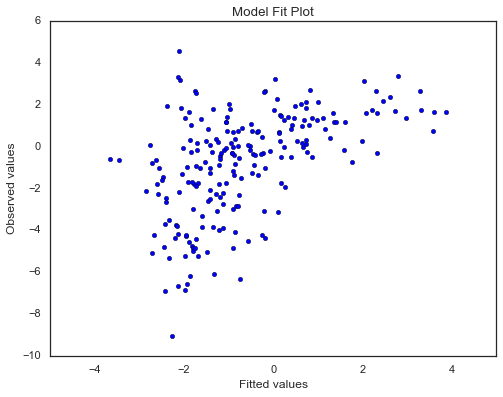

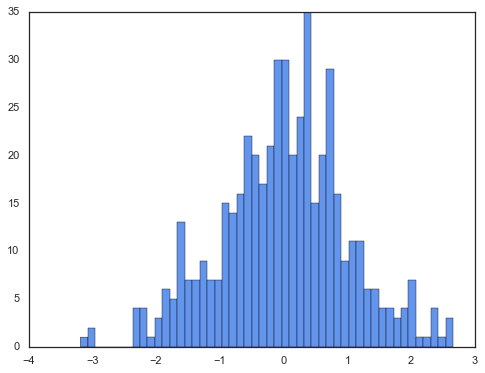

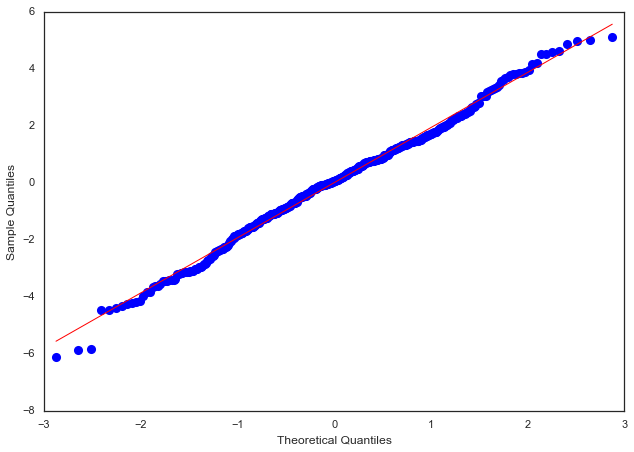

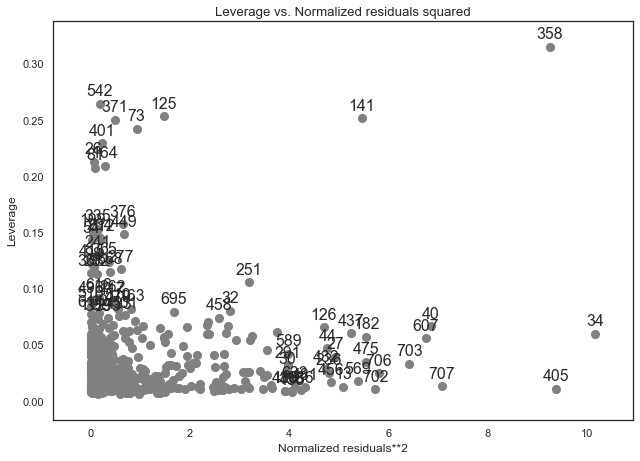

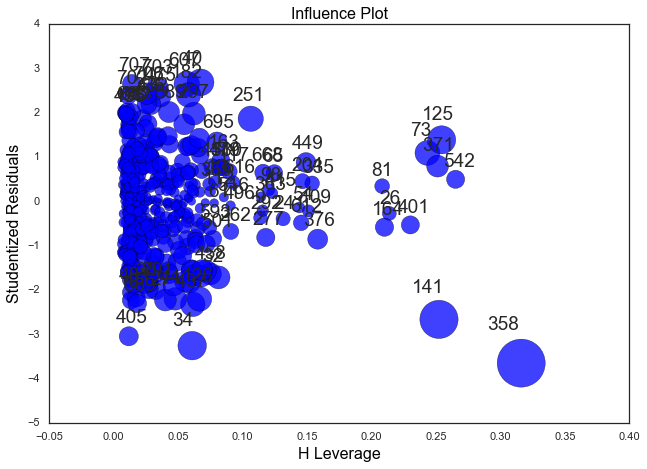

In [118]:
plotOLSdiagnostics(X_test,y_test,olsres)

## Arthouse Films -- Studio

In [120]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(ahFilms_Xs,ahFilms_ys.logW_RtnOInvest,
                                                                  test_size = .3, random_state=0)


In [121]:
models = assessModels(X_train, y_train)
grid_searcher = kfoldCV_gridsearchModelalpha(X_train, y_train)
# grid_searcher

Model: adaboostedTrees
Score: 0.302122578183

Model: linear_model
Score: 0.305048625755

Model: cart
Score: 0.213452469038

Model: gradboostedTrees
Score: 0.368705467591

Model: randomForest
Score: 0.260399506462

Model: ridge_model
Score: 0.309527762749

Model: lasso_model_1
Score: 0.314615746585

Model: lasso_model
Score: 0.245715077427

Model: extratrees
Score: 0.313325860308



In [122]:
## Lasso
best_model = grid_searcher.best_estimator_
# best_model.coef_
best_model.score(X_test,y_test)  
# best_model.alpha

0.21817880436399728

In [123]:
rerunModelwithAlpha(best_model, X_train, y_train)
# models

Model: lasso_model_0
Score: 0.344708124449
('OscarNom', 1.3147668280070555)
('foxsearchlight', 1.0379407568525358)
('weinsteincompany', 0.99582798492739688)
('miramax', 0.76978189256387419)
('paramount', 0.2555801333316321)
('openDTheatre', 0.044457730376723514)
('warnerbros', 0.03844422664761174)
('DURrelease', 0.01656697969901557)
('mv_runtime', -0.00071144838696987926)
('universal', 0.0)
('fox', 0.0)
('buenavista', -0.0)
('newline', 0.0)
('sonyclassics', 0.0)
('lionsgate', 0.0)
('mgm', -0.0)
('screengems', 0.0)
('focus', 0.0)
('magnolia', 0.0)
('ifc', 0.0)
('wb-newline', 0.0)
('dreamworks', 0.0)



In [148]:
model = getGBTfeatures(models,X_train,y_train)

('openDTheatre', 0.35343618107262414)
('mv_runtime', 0.22541499165232559)
('DURrelease', 0.19410837183067625)
('Horror', 0.042493163225601996)
('Sci-Fi', 0.032107580996768845)
('Documentary', 0.031403059612122093)
('OscarNom', 0.022765374216631898)
('Adventure', 0.01536043530914754)
('Action', 0.015285097796143314)
('Drama', 0.014605604169541445)
('Western', 0.013684060781075369)
('Fantasy', 0.012004867214796697)
('Romance', 0.0095648101419984304)
('Animation', 0.0066561515394191759)
('Thriller', 0.0056630637672177627)
('Comedy', 0.0054471866739093811)
('Foreign', 0.0)
('Period', 0.0)



In [151]:
model.score(X_test,y_test)

0.38150259781760198

In [152]:
# ahFilms_X2 = ahFilms_Xs.drop(['universal','fox','buenavista','newline','sonyclassics','lionsgate',
#                               'mgm','screengems','focus','magnolia','ifc','wb-newline','dreamworks'],axis=1)

ahFilms_X2 = ahFilms_Xs.drop(['buenavista'],axis=1)

In [153]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        ahFilms_X2, ahFilms_ys, test_size=0.3, random_state=223)

In [154]:
olsres = runOLS(X_train,y_train)
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     11.89
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           5.02e-32
Time:                        21:41:27   Log-Likelihood:                -1020.9
No. Observations:                 495   AIC:                             2086.
Df Residuals:                     473   BIC:                             2178.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -2.6868      0.622     -4.322      0.000        -3.908    -1.465
openDTheatre         0.0390      0.021      1.888      0.060        -0.002     0.079
mv_runtime          -0.0028      0.006     -0.489      0.625        -0.014     0.008
DURrelease           0.0118      0.001      8.180      0.000         0.009     0.015
OscarNom             1.5894      0.242      6.562      0.000         1.113     2.065
warnerbros           0.8184      0.548      1.494      0.136        -0.258     1.894
universal            0.7567      0.761      0.994      0.320        -0.738     2.252
fox                 -0.9728      0.986     -0.987      0.324        -2.910     0.964
paramount            0.3859      0.443      0.870      0.385        -0.485     1.257
miramax              1.3831      0.457      3.026      0.003         0.485     2.281
newline              0.1489      1.147      0.130      0.897        -2.105     2.402
foxsearchlight       2.4152      1.030      2.344      0.019         0.391     4.440
sonyclassics         0.4528      0.322      1.407      0.160        -0.180     1.085
lionsgate            1.3469      0.666      2.022      0.044         0.038     2.656
mgm                 -0.0621      0.749     -0.083      0.934        -1.534     1.409
screengems           2.1460      1.387      1.547      0.122        -0.579     4.871
weinsteincompany     1.5645      0.497      3.145      0.002         0.587     2.542
focus                1.1718      0.564      2.077      0.038         0.063     2.280
magnolia             0.3639      0.361      1.009      0.313        -0.345     1.073
ifc                  0.6843      0.402      1.702      0.089        -0.106     1.475
wb-newline           1.0255      2.254      0.455      0.649        -3.404     5.455
dreamworks           0.1320      1.141      0.116      0.908        -2.109     2.373
==============================================================================
Omnibus:                        6.853   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.844
Skew:                          -0.241   Prob(JB):                       0.0326
Kurtosis:                       3.316   Cond. No.                     4.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

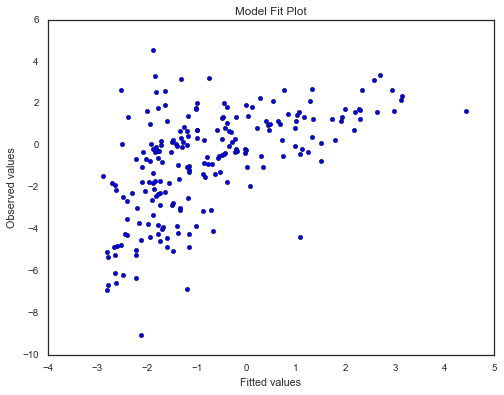

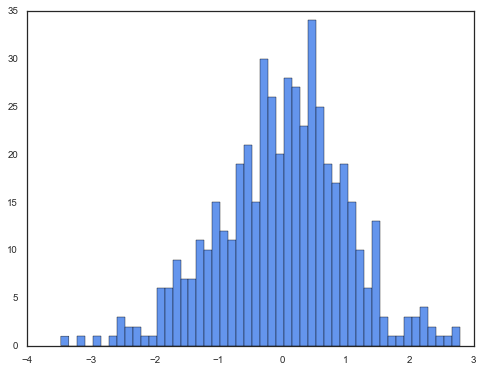

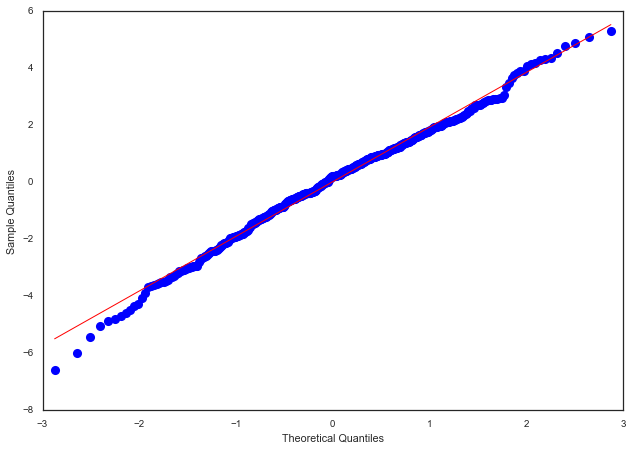

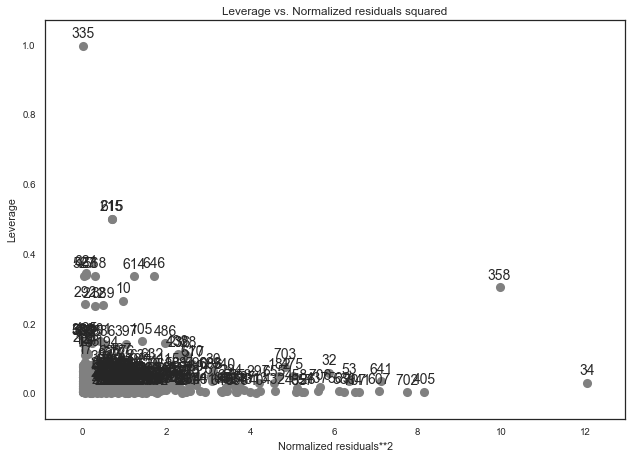

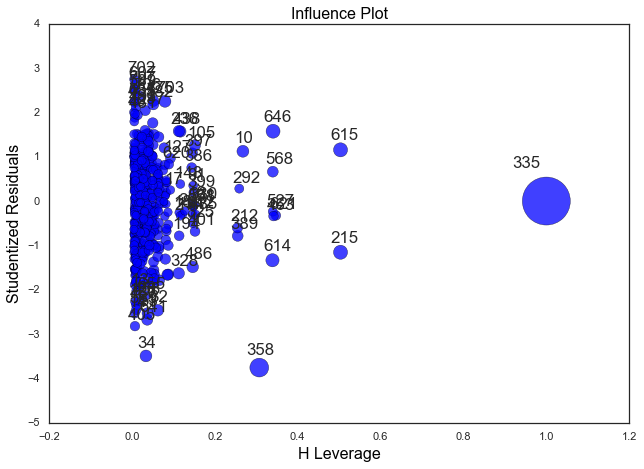

In [155]:
plotOLSdiagnostics(X_test,y_test,olsres)

## Boxoffic Films -- Genre

In [156]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_Xg,boFilms_yg.logW_RtnOInvest,
                                                                  test_size = .3, random_state=233)

In [157]:
models = assessModels(X_train, y_train)
grid_searcher = kfoldCV_gridsearchModelalpha(X_train, y_train)
# grid_searcher

Model: adaboostedTrees
Score: 0.220472033094

Model: linear_model
Score: 0.239253019189

Model: cart
Score: 0.0868638050256

Model: gradboostedTrees
Score: 0.26282693915

Model: randomForest
Score: 0.191822508319

Model: ridge_model
Score: 0.243369198128

Model: lasso_model_1
Score: 0.232870865016

Model: lasso_model
Score: 0.193087345312

Model: extratrees
Score: 0.140949625182



In [158]:
## Lasso
best_model = grid_searcher.best_estimator_
# best_model.coef_
best_model.score(X_test,y_test)
# best_model.alpha

0.31014858950264157

In [159]:
rerunModelwithAlpha(best_model, X_train, y_train)

Model: lasso_model_0
Score: 0.276806281258
('Documentary', 1.2708818497167351)
('Horror', 0.53244758213388677)
('Fantasy', -0.35777453904398832)
('Adventure', -0.30075495308250216)
('OscarNom', 0.29117845562466399)
('Animation', -0.28987685126811941)
('Sci-Fi', -0.19206571603713846)
('Romance', 0.19080178627240305)
('Comedy', -0.1186259815339764)
('Drama', 0.11108139352701288)
('Action', -0.063605640357534882)
('Western', -0.039022601024270784)
('Thriller', -0.018277277049717326)
('DURrelease', 0.0089541946466746309)
('mv_runtime', -0.0024326230806159393)
('openDTheatre', 0.00036876118790023812)
('Foreign', 0.0)
('Period', -0.0)



{'lasso_model_0': Lasso(alpha=0.0014174741629268048, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False)}

In [160]:
model = getGBTfeatures(models,X_train,y_train)

('openDTheatre', 0.35426054409078539)
('mv_runtime', 0.2274095572957584)
('DURrelease', 0.19309241339983543)
('Horror', 0.042446503565260113)
('Documentary', 0.031403059612122253)
('Sci-Fi', 0.027601367252814854)
('OscarNom', 0.022741562424153452)
('Adventure', 0.015360435309147564)
('Action', 0.015285097796143123)
('Drama', 0.01471202467223476)
('Western', 0.013684060781075067)
('Fantasy', 0.012004867214796331)
('Romance', 0.009564810141998871)
('Comedy', 0.0081144811372424082)
('Animation', 0.0066561515394143005)
('Thriller', 0.0056630637672177983)
('Foreign', 0.0)
('Period', 0.0)



GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [161]:
model.score(X_test,y_test)

0.38150259781760198

In [162]:
boFilms_X2 = boFilms_Xg.drop(['Foreign','Period'],axis=1)

In [163]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        boFilms_X2, boFilms_yg, test_size=0.3, random_state=223)


In [164]:
olsres = runOLS(X_train,y_train)
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     28.59
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.60e-71
Time:                        21:42:13   Log-Likelihood:                -1397.9
No. Observations:                1075   AIC:                             2830.
Df Residuals:                    1058   BIC:                             2914.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.9741      0.247     -3.946      0.000        -1.458    -0.490
openDTheatre     0.0004   3.61e-05     11.535      0.000         0.000     0.000
mv_runtime      -0.0031      0.002     -1.445      0.149        -0.007     0.001
DURrelease       0.0096      0.001      9.461      0.000         0.008     0.012
OscarNom         0.3154      0.115      2.749      0.006         0.090     0.541
Animation       -0.5507      0.159     -3.458      0.001        -0.863    -0.238
Adventure       -0.3387      0.137     -2.479      0.013        -0.607    -0.071
Action          -0.1235      0.089     -1.393      0.164        -0.297     0.050
Comedy          -0.1221      0.082     -1.481      0.139        -0.284     0.040
Drama            0.0208      0.095      0.219      0.827        -0.166     0.207
Documentary      1.6810      0.378      4.447      0.000         0.939     2.423
Fantasy         -0.1952      0.168     -1.164      0.245        -0.524     0.134
Horror           0.4281      0.102      4.203      0.000         0.228     0.628
Sci-Fi          -0.3680      0.126     -2.923      0.004        -0.615    -0.121
Thriller         0.0411      0.100      0.411      0.681        -0.155     0.237
Western         -0.9051      0.407     -2.222      0.026        -1.704    -0.106
Romance          0.1406      0.106      1.323      0.186        -0.068     0.349
==============================================================================
Omnibus:                       54.144   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.393
Skew:                           0.338   Prob(JB):                     7.89e-24
Kurtosis:                       4.385   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

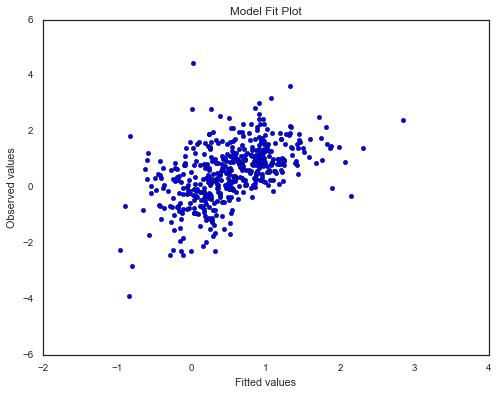

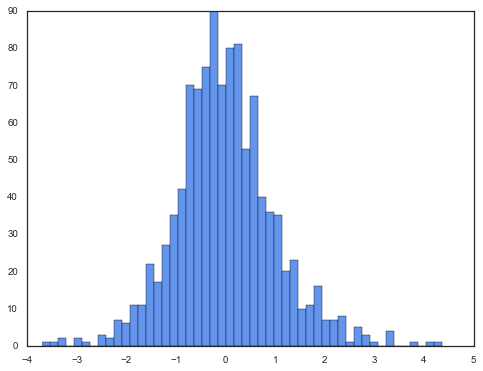

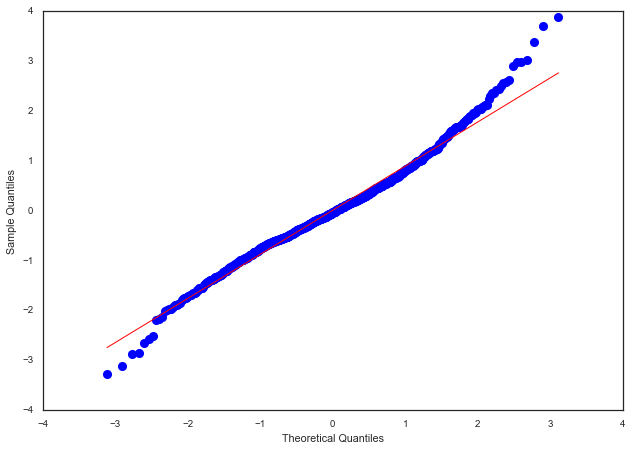

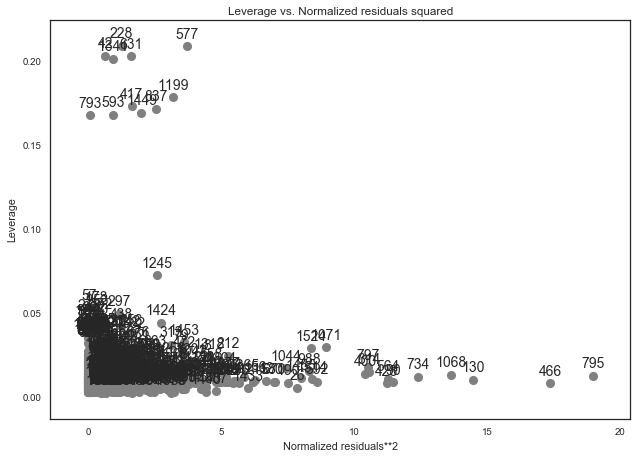

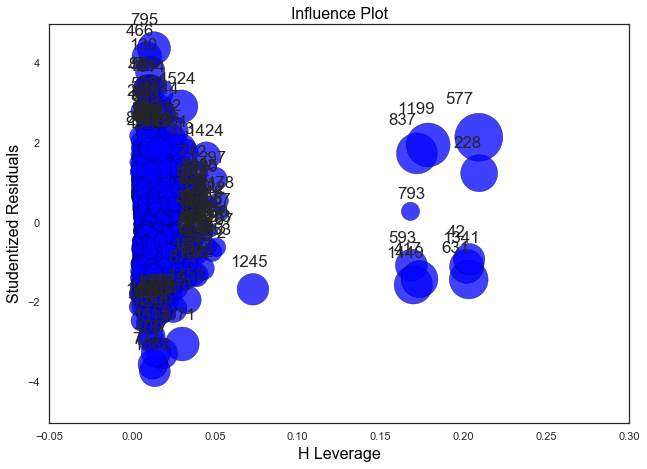

In [165]:
plotOLSdiagnostics(X_test,y_test,olsres)

## Boxoffice Films -- Studio

In [166]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(boFilms_Xs,boFilms_ys.logW_RtnOInvest,
                                                                  test_size = .3, random_state=233)

In [167]:
models = assessModels(X_train, y_train)
grid_searcher = kfoldCV_gridsearchModelalpha(X_train, y_train)
# grid_searcher

Model: adaboostedTrees
Score: 0.194224988224

Model: linear_model
Score: 0.236158302639

Model: cart
Score: 0.0564744600277

Model: gradboostedTrees
Score: 0.212793755357

Model: randomForest
Score: 0.15934609315

Model: ridge_model
Score: 0.236768871094

Model: lasso_model_1
Score: 0.217567407974

Model: lasso_model
Score: 0.193087345312

Model: extratrees
Score: 0.1056853977



In [168]:
## Lasso
best_model = grid_searcher.best_estimator_
# best_model.coef_
best_model.score(X_test,y_test)
# best_model.alpha

0.31502024657474137

In [169]:
rerunModelwithAlpha(best_model, X_train, y_train)

Model: lasso_model_0
Score: 0.262272892281
('mgm', -0.57623130798707611)
('buenavista', -0.47874910372282387)
('dreamworks', -0.41830862068282487)
('wb-newline', 0.4123142668405157)
('foxsearchlight', 0.41000171316270051)
('screengems', 0.39560415862255321)
('warnerbros', -0.36698181296814381)
('fox', -0.34647595105712037)
('lionsgate', 0.32242006913024712)
('OscarNom', 0.29750391778854779)
('newline', -0.28627009321640956)
('miramax', -0.17782385680491777)
('focus', 0.15340450946499853)
('universal', 0.13607911183200239)
('paramount', -0.061795828999168523)
('weinsteincompany', -0.036989626663396905)
('DURrelease', 0.010035336303966771)
('mv_runtime', -0.0026340537687411666)
('openDTheatre', 0.00031089137371677008)
('sonyclassics', 0.0)
('magnolia', 0.0)
('ifc', 0.0)



{'lasso_model_0': Lasso(alpha=0.00011497569953977356, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False)}

In [172]:
model = getGBTfeatures(models,X_train,y_train)

('openDTheatre', 0.3504446184637659)
('DURrelease', 0.22511030801988771)
('mv_runtime', 0.19449856069771382)
('OscarNom', 0.032839577113748734)
('lionsgate', 0.024112138195668095)
('buenavista', 0.023927860798137909)
('warnerbros', 0.022486091057260169)
('universal', 0.021961661376046483)
('mgm', 0.019551262956130629)
('screengems', 0.018419880601377437)
('miramax', 0.012807567495209201)
('fox', 0.012015403614040418)
('dreamworks', 0.0097131969786550462)
('focus', 0.0086123598468366442)
('paramount', 0.0086004577659321985)
('newline', 0.0070523186711713469)
('wb-newline', 0.0060404909764906808)
('weinsteincompany', 0.0012188396170722175)
('foxsearchlight', 0.00058740575485527198)
('sonyclassics', 0.0)
('magnolia', 0.0)
('ifc', 0.0)



In [173]:
model.score(X_test,y_test)

0.35740806571918027

In [174]:
boFilms_X2 = boFilms_Xs.drop(['sonyclassics','magnolia','ifc'],axis=1)


In [175]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        boFilms_X2, boFilms_ys, test_size=0.3, random_state=223)


In [177]:
olsres = runOLS(X_train,y_train)
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logW_RtnOInvest   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     23.29
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           2.41e-67
Time:                        21:45:55   Log-Likelihood:                -1402.8
No. Observations:                1075   AIC:                             2846.
Df Residuals:                    1055   BIC:                             2945.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               -0.9554      0.215     -4.439      0.000        -1.378    -0.533
openDTheatre         0.0003   3.61e-05      8.678      0.000         0.000     0.000
mv_runtime          -0.0024      0.002     -1.287      0.199        -0.006     0.001
DURrelease           0.0114      0.001     10.442      0.000         0.009     0.014
OscarNom             0.2253      0.114      1.968      0.049         0.001     0.450
warnerbros          -0.3167      0.102     -3.106      0.002        -0.517    -0.117
universal            0.2612      0.103      2.538      0.011         0.059     0.463
fox                 -0.2904      0.101     -2.873      0.004        -0.489    -0.092
buenavista          -0.4434      0.117     -3.797      0.000        -0.673    -0.214
paramount            0.1292      0.107      1.203      0.229        -0.082     0.340
miramax             -0.2141      0.190     -1.128      0.260        -0.587     0.158
newline             -0.1392      0.152     -0.913      0.361        -0.438     0.160
foxsearchlight       0.3926      0.226      1.736      0.083        -0.051     0.837
lionsgate            0.3395      0.135      2.522      0.012         0.075     0.604
mgm                 -0.3983      0.182     -2.187      0.029        -0.756    -0.041
screengems           0.5261      0.160      3.293      0.001         0.213     0.840
weinsteincompany    -0.1795      0.266     -0.675      0.500        -0.702     0.343
focus                0.2348      0.240      0.980      0.328        -0.236     0.705
wb-newline           0.5762      0.235      2.452      0.014         0.115     1.037
dreamworks          -0.3623      0.277     -1.306      0.192        -0.907     0.182
==============================================================================
Omnibus:                       81.822   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.314
Skew:                           0.454   Prob(JB):                     9.48e-41
Kurtosis:                       4.814   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

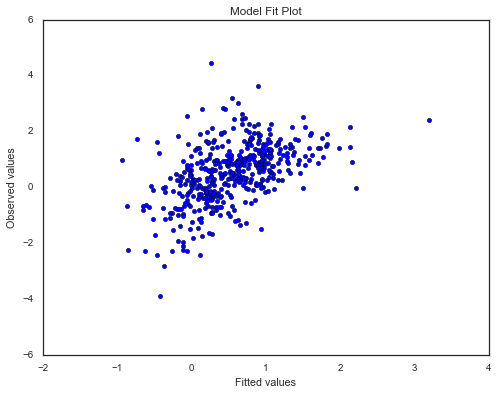

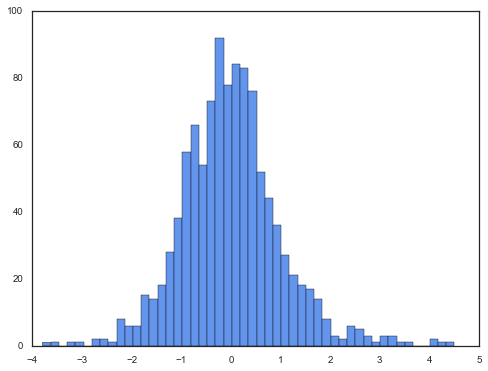

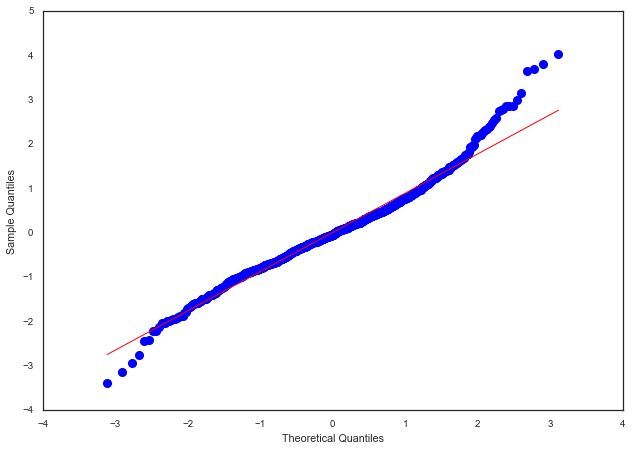

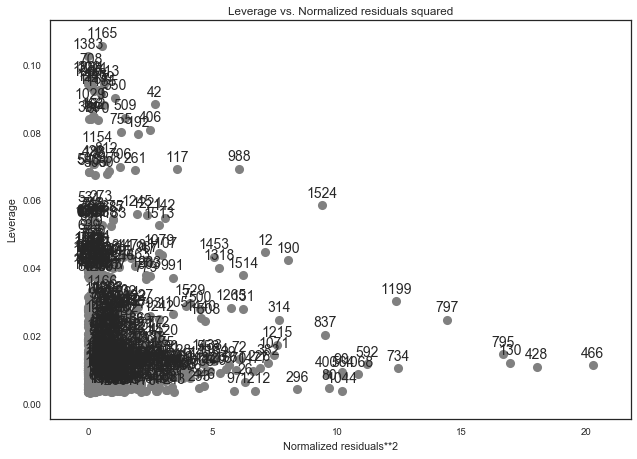

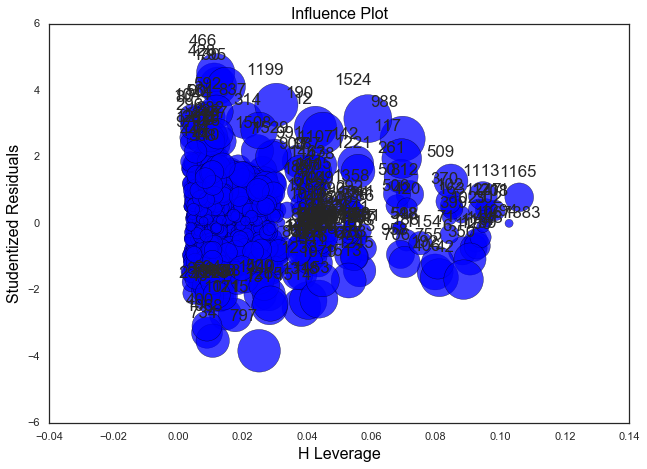

In [178]:
plotOLSdiagnostics(X_test,y_test,olsres)